In [5]:
import json
import requests
import time
import matplotlib.pyplot as plt
import numpy as np

In [6]:
headers = {
    'Accept-Encoding': 'gzip, deflate, sdch',
    'Accept-Language': 'en-US,en;q=0.8,ru;q=0.6',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Referer': 'https://stats.nba.com/teams/boxscores-traditional/',
    'x-nba-stats-origin': 'stats',
    'x-nba-stats-token': 'true'
}
team_stats = "https://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=%s&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=%s&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=%s&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision="
years = ['2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

In [7]:
def get_arrs_for_period(period, years=years, team_stats=team_stats):
    X = []
    Y = []
    for year in years:
        result_base_json = requests.get(team_stats % ('Base', period, year), headers=headers).json()
        row_head = result_base_json['resultSets'][0]['headers']
        teams = result_base_json['resultSets'][0]['rowSet']
        result_advanced_json = requests.get(team_stats % ('Advanced', period, year), headers=headers).json()
        row_heada = result_advanced_json['resultSets'][0]['headers']
        teamsa = result_advanced_json['resultSets'][0]['rowSet']
        for i, team in enumerate(teams):
            team_dict = dict(zip(row_head, team))
            adv_dict = dict(zip(row_heada, teamsa[i]))
            possessions = adv_dict['PACE']
            points = team_dict['PTS']
            X.append(possessions)
            Y.append(points)
        time.sleep(0.5)
    return np.array(X), np.array(Y)

In [34]:
def get_average_per_year(years=years[0:-1]):
    retX = []
    retY = []
    for year in years:
        result_base_json = requests.get(team_stats % ('Base', 5, year), headers=headers).json()
        row_head = result_base_json['resultSets'][0]['headers']
        teams = result_base_json['resultSets'][0]['rowSet']
        X = []
        for i, team in enumerate(teams):
            team_dict = dict(zip(row_head, team))
            points = team_dict['PTS']
            X.append(points)
        retX.append(np.mean(np.array(X)))
    return retX

In [35]:
avg = get_average_per_year()

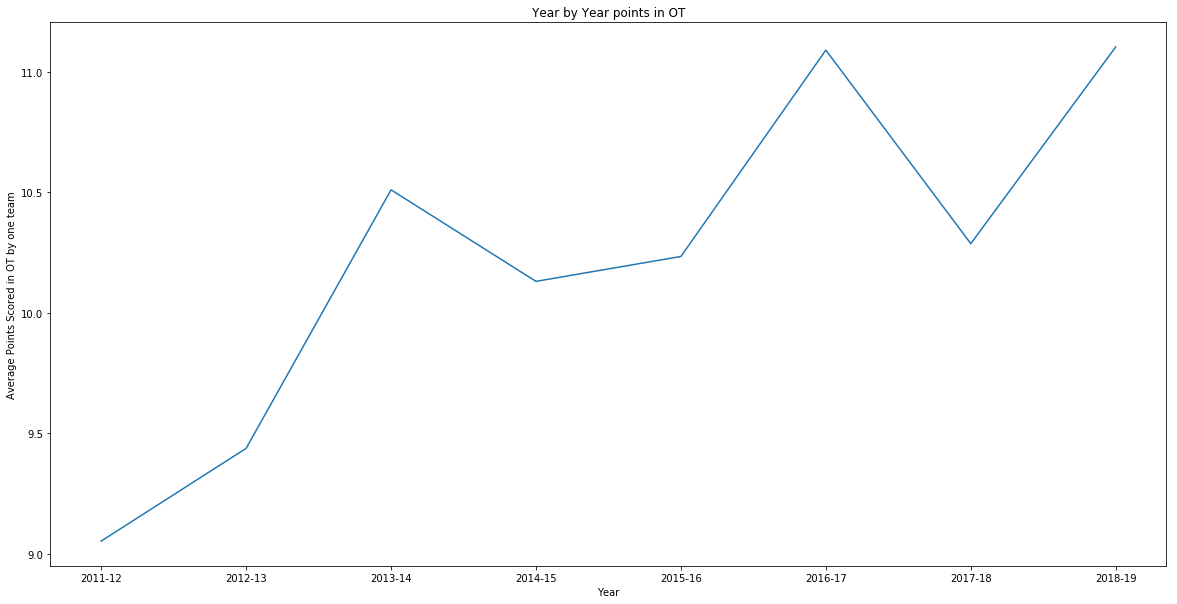

In [49]:
plt.plot(years[0:-1], avg)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Year")
plt.ylabel("Average Points Scored in OT by one team")
plt.title("Year by Year points in OT")

plt.show()

In [8]:
possot, ptsot = get_arrs_for_period(5)

In [9]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
def get_model_feats(x,y):
    regr = linear_model.LinearRegression()
    regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))
    yhat = regr.predict(x.reshape(-1, 1))
    print('Coefficients: \n', regr.coef_)
    print('Mean squared error: %.2f'
          % mean_squared_error(y, yhat))
    print('Coefficient of determination: %.2f'
          % r2_score(y, yhat))

In [74]:
from numpy.random import choice
p0 = 0.505
p1 = 0.031
p2 = 0.325
p3 = 0.137
p4 = 0.002
average_pdist = [p0,p1,p2,p3,p4]

In [153]:
def get_final_freq(freq2, freq3):
    final_freq = (1-0.033)-0.5*freq2-0.35*freq3
    return [final_freq, 0.031, freq2*0.5, freq3*0.35, 0.002]

In [144]:
test_pdist = np.array(get_final_freq(freq2=0.1,freq3=0.9))

In [ ]:
def sim(nsimulations, pdistx=average_pdist, pdisty=average_pdist, x_start=0, y_start=0, target_score=11):
    xwins = 0
    ywins = 0
    for games in range(0,nsimulations):
        xball = True
        x_score = x_start
        y_score = y_start
        while x_score < target_score and y_score < target_score:
            if xball:
                draw = choice([0,1,2,3,4], 1,
                      p=pdistx)
                x_score += draw
                xball = False
            else:
                draw = choice([0,1,2,3,4], 1,
                      p=pdisty)
                y_score += draw
                xball = True
            if x_score >= target_score:
                xwins += 1
            if y_score >= target_score:
                ywins += 1
    
    return xwins/(xwins+ywins)

In [233]:
def sim(nsimulations, pdistx=average_pdist, pdisty=average_pdist, x_start=0, y_start=0):
    xwins = 0
    ywins = 0
    total3sw = 0
    total1sw = 0
    total2sw = 0
    total4sw = 0
    total3sl = 0
    total1sl = 0
    total2sl = 0
    total4sl = 0
    for games in range(0,nsimulations):
        xball = True
        x_score = x_start
        y_score = y_start
        n3sx = 0
        n3sy = 0
        n2sx = 0
        n2sy = 0
        n1sx = 0
        n1sy = 0
        n4sx = 0
        n4sy = 0
        while x_score < 11 and y_score < 11:
            if xball:
                
                draw = choice([0,1,2,3,4], 1,
                      p=pdistx)
                x_score += draw
                xball = False
                
                if draw == 3:
                    n3sx += 1
                if draw == 4:
                    n4sx += 1
                if draw == 2:
                    n2sx += 1
                if draw == 1:
                    n1sx += 1
            else:
                
                draw = choice([0,1,2,3,4], 1,
                      p=pdisty)
                y_score += draw
                xball = True
                
                if draw == 3:
                    n3sy += 1
                if draw == 4:
                    n4sy += 1
                if draw == 2:
                    n2sy += 1
                if draw == 1:
                    n1sy += 1
                    
            if x_score >= 11:
                xwins += 1
                total3sw += n3sx
                total3sl += n3sy
                total2sw += n2sx
                total2sl += n2sy
                total1sw += n1sx
                total1sl += n1sy
                total4sw += n4sx
                total4sl += n4sy
            if y_score >= 11:
                ywins += 1
                total3sl += n3sx
                total3sw += n3sy
                total2sl += n2sx
                total2sw += n2sy
                total1sl += n1sx
                total1sw += n1sy
                total4sl += n4sx
                total4sw += n4sy
    
    average_w_3s = total3sw/(xwins+ywins)
    average_l_3s = total3sl/(xwins+ywins)
    average_w_2s = total2sw/(xwins+ywins)
    average_l_2s = total2sl/(xwins+ywins)
    average_w_1s = total1sw/(xwins+ywins)
    average_l_1s = total1sl/(xwins+ywins)
    average_w_4s = total4sw/(xwins+ywins)
    average_l_4s = total4sl/(xwins+ywins)
    
    ugly = [average_w_1s, average_l_1s, average_w_2s, average_l_2s, average_w_3s, average_l_3s, average_w_4s, average_l_4s]
    
                
    return xwins/(xwins+ywins), 1-(xwins/(xwins+ywins)), ugly

In [190]:
timex = ['4:20', '3:40', '3:00', "2:20", "1:40", "1:00", "0:20"]
probt = [0.743, 0.765, 0.791, 0.832, 0.878, 0.919, 0.963]
low_scorex = [0,1,2,3,4,5,6]
probs = [sim(100000, x_start=i, y_start=i+4)[1] for i in low_scorex]

In [234]:
cool = sim(10000)

In [235]:
winning = cool[2][0::2]
losing = cool[2][1::2]

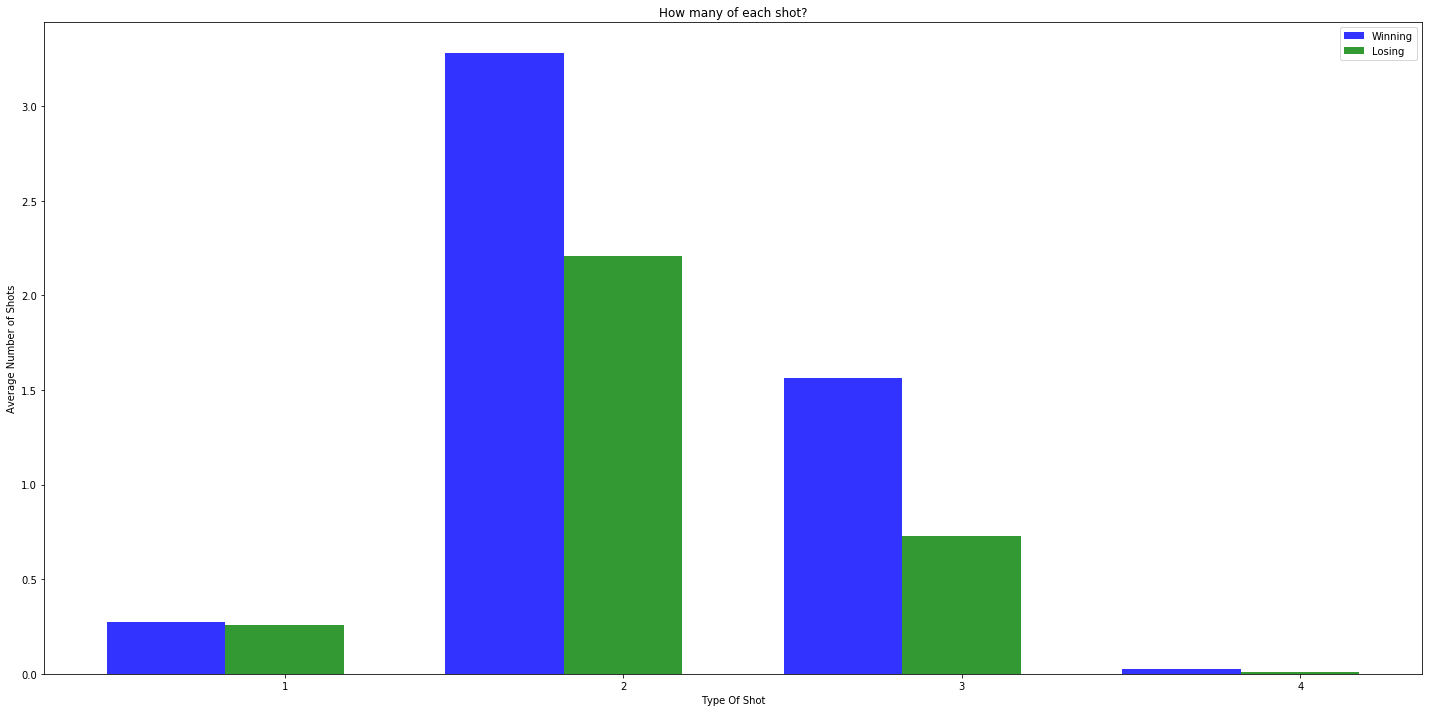

In [236]:
fig, ax = plt.subplots()
n_groups = 4

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, winning, bar_width,
alpha=opacity,
color='b',
label='Winning')

rects2 = plt.bar(index + bar_width, losing, bar_width,
alpha=opacity,
color='g',
label='Losing')

plt.xlabel('Type Of Shot')
plt.ylabel('Average Number of Shots')
plt.title('How many of each shot?')
plt.xticks(index + bar_width, ('1', '2', '3', '4'))
plt.legend()

plt.tight_layout()
plt.show()

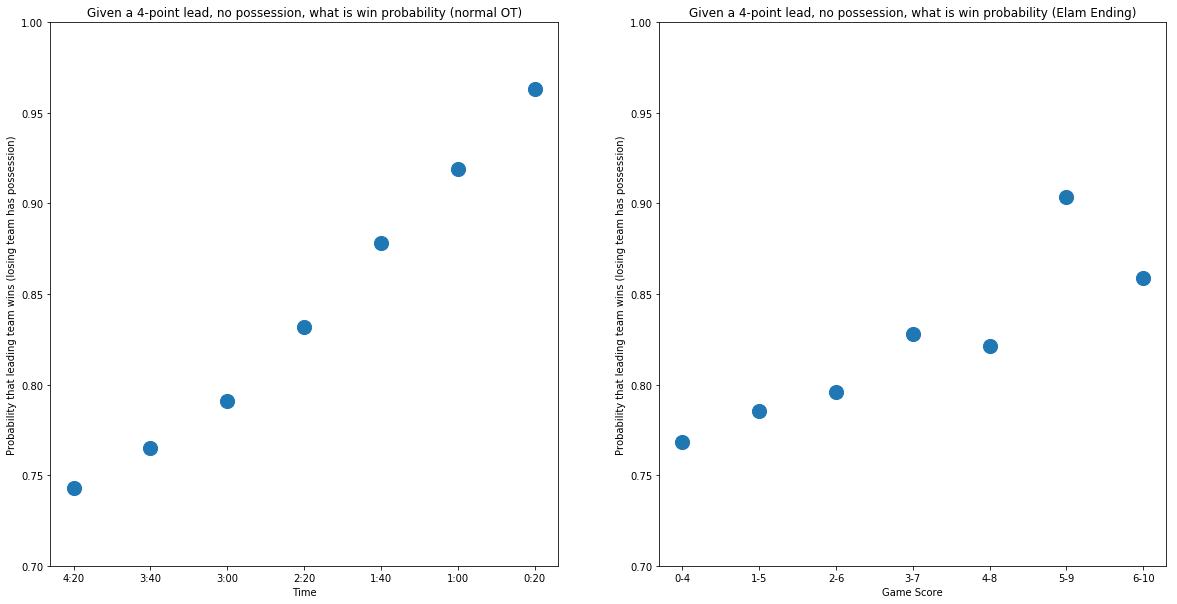

In [211]:
plt.subplot(1, 2, 1)
plt.scatter(timex,probt,s=200)
plt.ylim([0.7,1])
plt.xlabel("Time")
plt.ylabel("Probability that leading team wins (losing team has possession)")
plt.title("Given a 4-point lead, no possession, what is win probability (normal OT)")
plt.subplot(1, 2, 2)
plt.scatter(['0-4', '1-5', '2-6', '3-7', '4-8', '5-9', '6-10'], probs,s=200)
plt.ylim([0.7,1])
plt.xlabel("Game Score")
plt.ylabel("Probability that leading team wins (losing team has possession)")
plt.title("Given a 4-point lead, no possession, what is win probability (Elam Ending)")
plt.show()


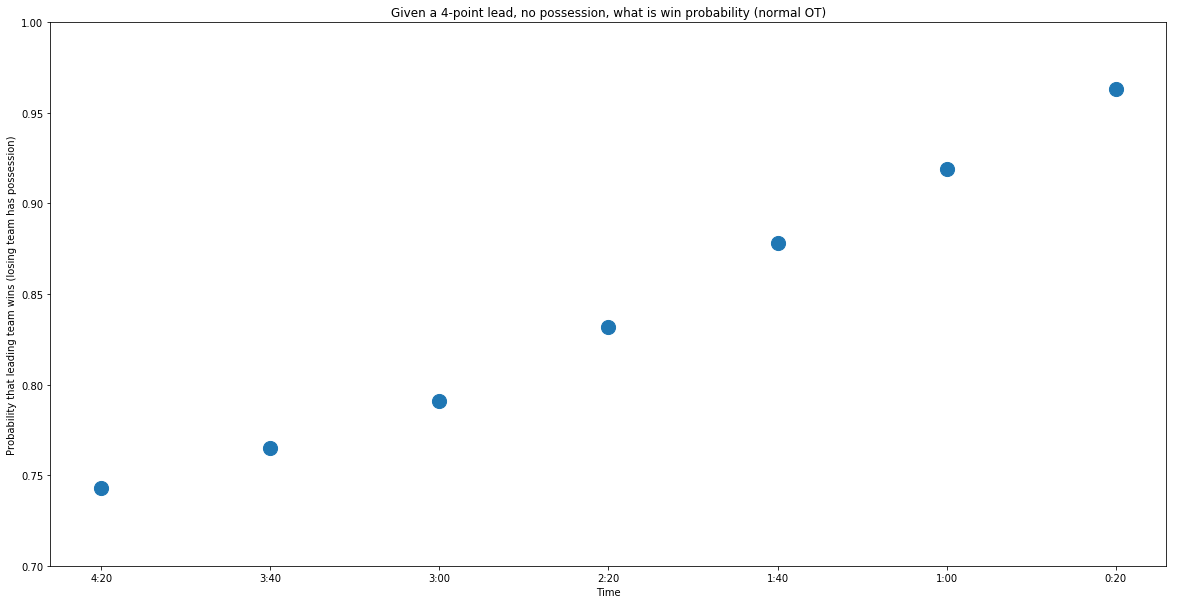

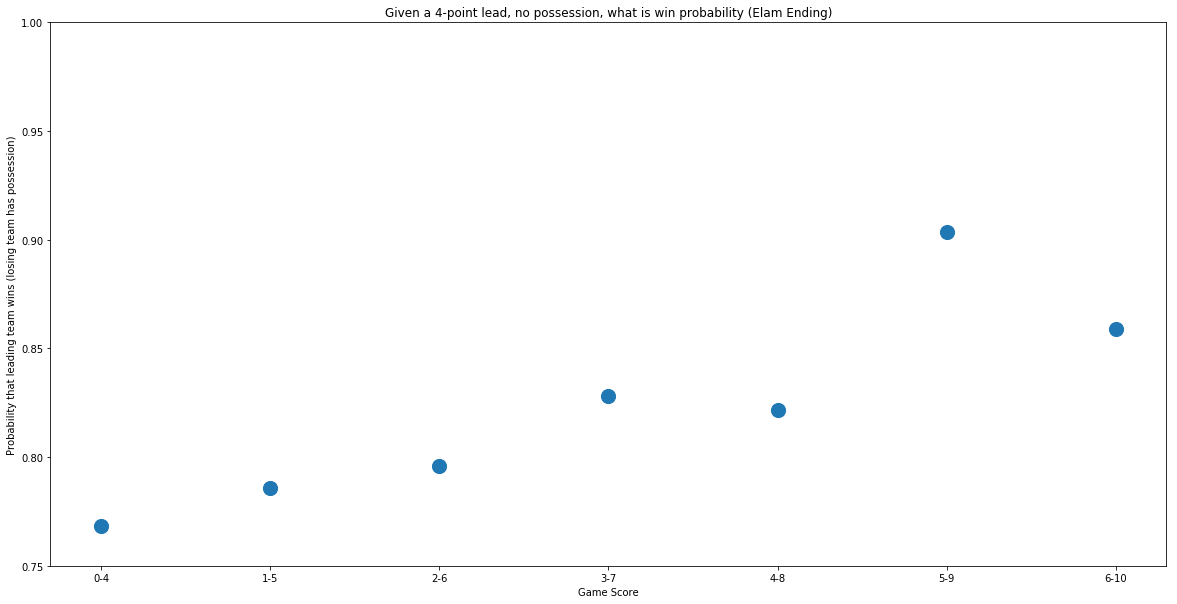

In [209]:
plt.scatter(['0-4', '1-5', '2-6', '3-7', '4-8', '5-9', '6-10'], probs,s=200)
plt.ylim([0.75,1])
plt.xlabel("Game Score")
plt.ylabel("Probability that leading team wins (losing team has possession)")
plt.title("Given a 4-point lead, no possession, what is win probability (Elam Ending)")
plt.show()

In [189]:
sim(100000, x_start=4, y_start=8)

(0.17728, 0.82272)

In [166]:
X = []
Y = []
for x in range(0,100):
    freq3 = x/100
    test_pdist = np.array(get_final_freq(freq2=1-freq3,freq3=freq3))
    pwin = sim(100000, pdisty=test_pdist)[1]
    X.append(freq3)
    Y.append(pwin)

In [160]:
# first_simX = X
# first_simY = Y

Text(0, 0.5, 'Win Probability')

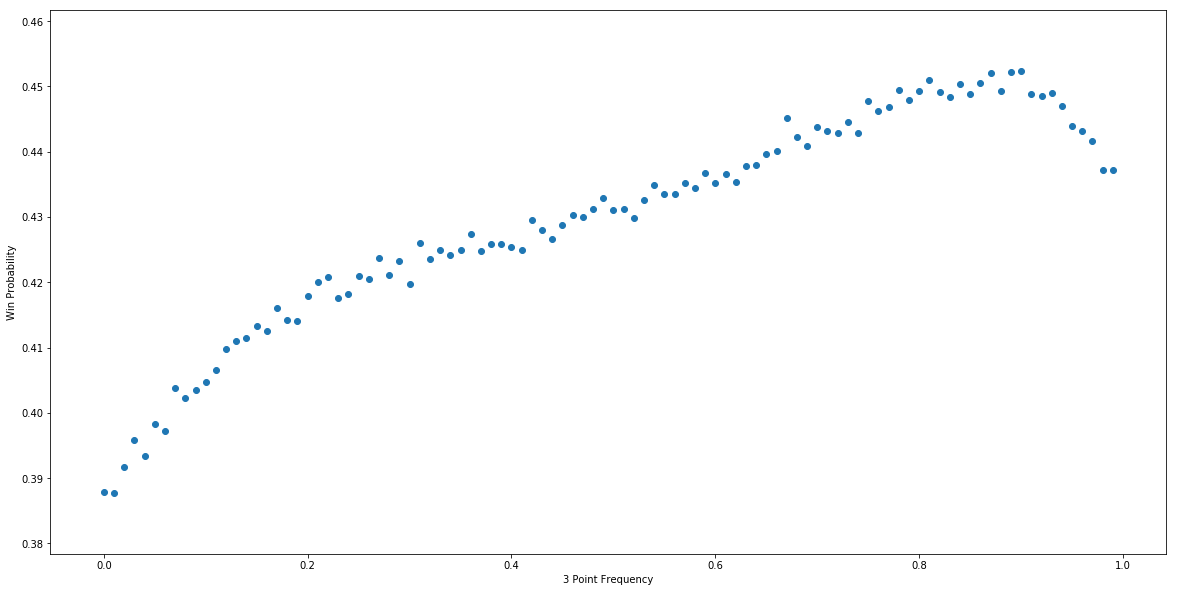

In [168]:
plt.scatter(X,Y)
plt.xlabel("3 Point Frequency")
plt.ylabel("Win Probability")

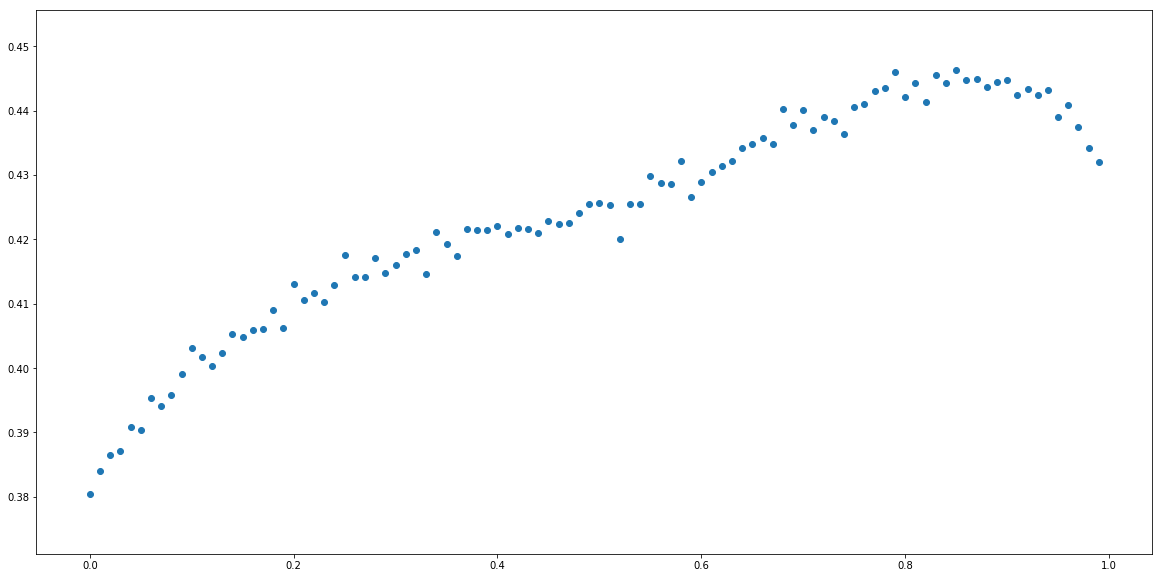

In [158]:
plt.scatter(first_simX, first_simY)